# Homework Week 3 - Jon Workman

In [263]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
%matplotlib inline

In [264]:
df = pd.read_csv('seattleWeather_1948-2017.csv').dropna()

## Clean data and add feature

In [265]:
df.RAIN = df.RAIN.astype(int)
df['DATE'] =  pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df['DAY'] = df['DATE'].apply(date.isoweekday)

In [266]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,DAY
0,1948-01-01,0.47,51,42,1,4
1,1948-01-02,0.59,45,36,1,5
2,1948-01-03,0.42,45,35,1,6
3,1948-01-04,0.31,45,34,1,7
4,1948-01-05,0.17,45,32,1,1


## Visualisation

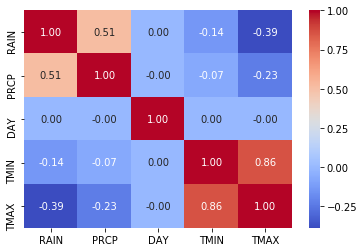

In [267]:
g = sns.heatmap(df_train[['RAIN', 'PRCP','DAY','TMIN','TMAX']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

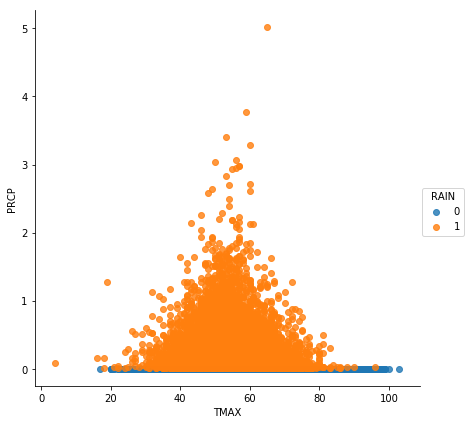

In [268]:
g = sns.lmplot(x='TMAX', y= 'PRCP', data=df, fit_reg=False, hue='RAIN', size=6)

## Split dataset

In [269]:
start1 = pd.datetime(1950, 1, 1)
end1 = pd.datetime(2009, 12, 31)
start2 = pd.datetime(2010,1,1)
end2 = pd.datetime(2017,12,31)

df_train = df[(df.DATE >= start1) & (df.DATE <= end1)]
df_validation = df[(df.DATE >= start2) & (df.DATE <= end2)]

In [270]:
df_train.shape

(21912, 6)

In [271]:
df_validation.shape

(2905, 6)

## Train and test

In [272]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['DATE', 'DAY', 'RAIN'],axis=1),df_train['RAIN'],
test_size=0.30, random_state=0)

In [273]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [274]:
logpredictions = logmodel.predict(X_test)

In [275]:
print(accuracy_score(y_test,logpredictions))

0.92576817767


[[3769   21]
 [ 467 2317]]


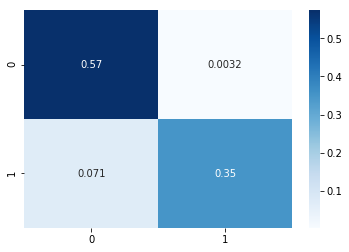

In [276]:
print(confusion_matrix(y_test,logpredictions))
sns.heatmap(confusion_matrix(y_test, logpredictions) / len(y_test), cmap='Blues', annot=True)

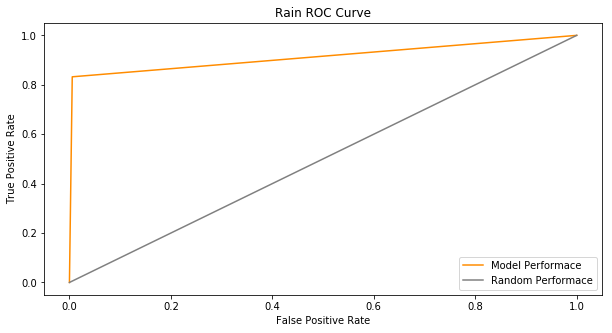

In [277]:
fpr, tpr, thresholds = roc_curve(y_test, logpredictions)

fig, ax = plt.subplots(1, figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rain ROC Curve')
plt.legend(loc="lower right")

In [278]:
print(classification_report(y_test,logpredictions))

             precision    recall  f1-score   support

          0       0.89      0.99      0.94      3790
          1       0.99      0.83      0.90      2784

avg / total       0.93      0.93      0.92      6574



## Validation

In [294]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_validation.drop(['DATE', 'DAY', 'RAIN'],axis=1),df_validation['RAIN'],
test_size=0.30,random_state=0)

In [295]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_test2,y_test2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [296]:
logpredictions2 = logmodel2.predict(X_test2)

In [297]:
print(accuracy_score(y_test2,logpredictions2))

0.852064220183


[[413  48]
 [ 81 330]]


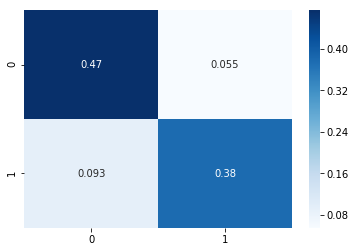

In [298]:
print(confusion_matrix(y_test2,logpredictions2))
sns.heatmap(confusion_matrix(y_test2, logpredictions2) / len(y_test2), cmap='Blues', annot=True)

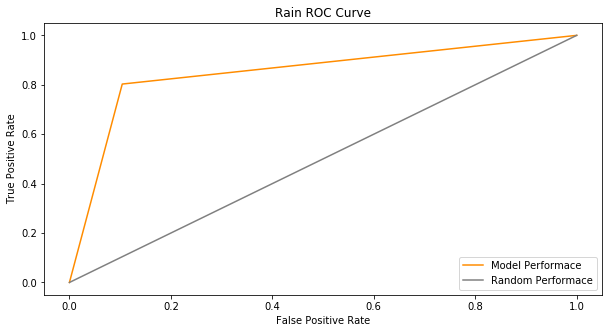

In [299]:
fpr, tpr, thresholds = roc_curve(y_test2, logpredictions2)

fig, ax = plt.subplots(1, figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rain ROC Curve')
plt.legend(loc="lower right")

In [300]:
print(classification_report(y_test2,logpredictions2))

             precision    recall  f1-score   support

          0       0.84      0.90      0.86       461
          1       0.87      0.80      0.84       411

avg / total       0.85      0.85      0.85       872

